In [1]:
# --- Step 1: Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

In [4]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [6]:
# Example filename: iris.csv
import io
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

In [7]:
# --- Step 3: Basic Data Exploration ---
print("✅ Dataset Loaded Successfully!\n")
print(df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())

✅ Dataset Loaded Successfully!

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   15

In [8]:
# --- Step 4: Data Cleaning (if needed) ---
df = df.dropna()
df = df.drop_duplicates()

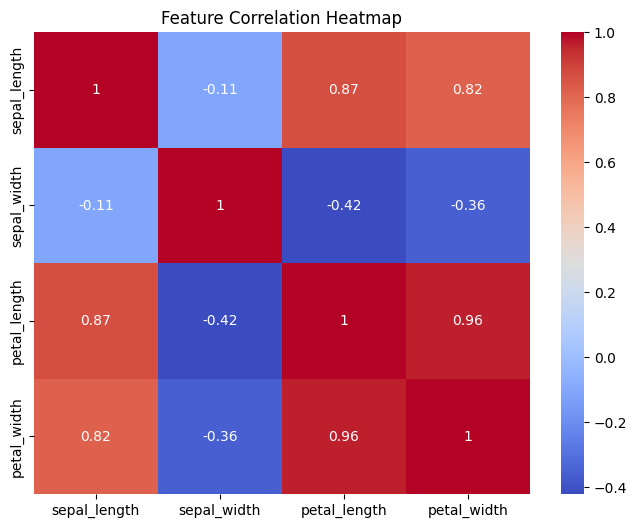

In [9]:
# --- Step 5: Data Visualization / EDA ---
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

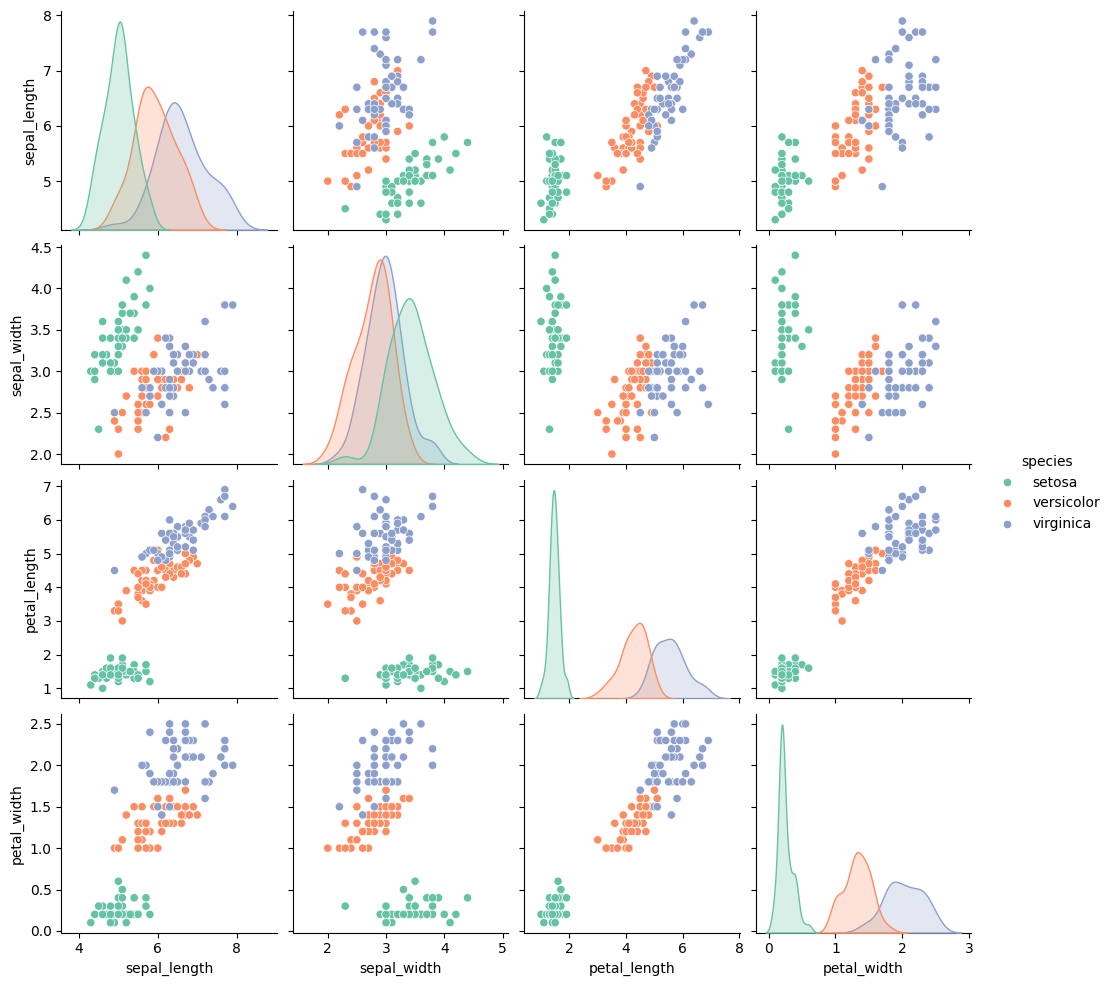

In [11]:
# Pair Plot to visualize relationships between features
sns.pairplot(df, hue="species", palette="Set2")
plt.show()

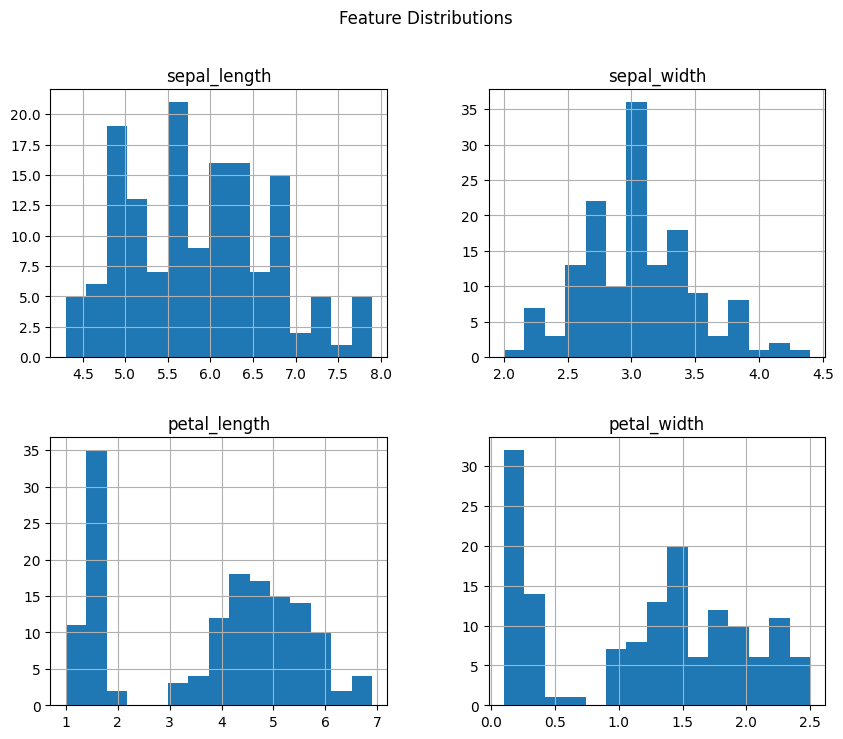

In [12]:
# Distribution of each feature
df.hist(figsize=(10,8), bins=15)
plt.suptitle("Feature Distributions")
plt.show()

In [14]:
# --- Step 6: Data Preprocessing for ANN ---
# Encode categorical variable
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [17]:
# Split features and target
X = df.drop(['species'], axis=1)
y = df['species']

In [18]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nTraining Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Training Samples: 117
Testing Samples: 30


In [19]:
# --- Step 7: Build Artificial Neural Network ---
model = Sequential([
    Dense(8, input_dim=X_train.shape[1], activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# --- Step 8: Train the Model ---
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8, verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4766 - loss: 1.0954 - val_accuracy: 0.6000 - val_loss: 1.0565
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4822 - loss: 1.0477 - val_accuracy: 0.5333 - val_loss: 1.0330
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5452 - loss: 1.0098 - val_accuracy: 0.5333 - val_loss: 1.0139
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6542 - loss: 0.9693 - val_accuracy: 0.5333 - val_loss: 0.9955
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6595 - loss: 0.9380 - val_accuracy: 0.6667 - val_loss: 0.9779
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6489 - loss: 0.9380 - val_accuracy: 0.6667 - val_loss: 0.9601
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6297 - loss: 0.8988 - val_accuracy: 0.6667 - val_loss: 0.9408
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6869 - loss: 0.8726 - val_accuracy: 0.6667 - val_loss

In [21]:
# --- Step 9: Evaluate the Model ---
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


In [ ]:
# --- Step 10: Visualize Model Performance ---
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()